# What is PCA?

As a layman, it is a method of summarizing data. Imagine some wine bottles on a dining table. Each wine is described by its attributes like colour, strength, age, etc. But redundancy will arise because many of them will measure related properties. So what PCA will do in this case is summarize each wine in the stock with less characteristics. 

In [99]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('wine.data', header = None)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
data.columns = ['Origin_of_Wines','Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_ash',
               'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
               'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Poline']

In [12]:
data.head()

,Origin_of_Wines,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Poline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
data.shape

(178, 14)

In [13]:
data['Origin_of_Wines'].value_counts()

2    71
1    59
3    48
Name: Origin_of_Wines, dtype: int64

In [14]:
data.isnull().any()

Origin_of_Wines         False
Alcohol                 False
Malic_Acid              False
Ash                     False
Alcalinity_of_ash       False
Magnesium               False
Total_phenols           False
Flavanoids              False
Nonflavanoid_phenols    False
Proanthocyanins         False
Color_intensity         False
Hue                     False
OD280                   False
Poline                  False
dtype: bool

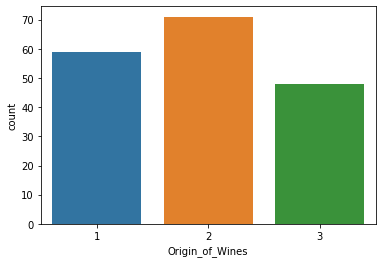

In [16]:
sb.countplot(data['Origin_of_Wines'])
plt.show()

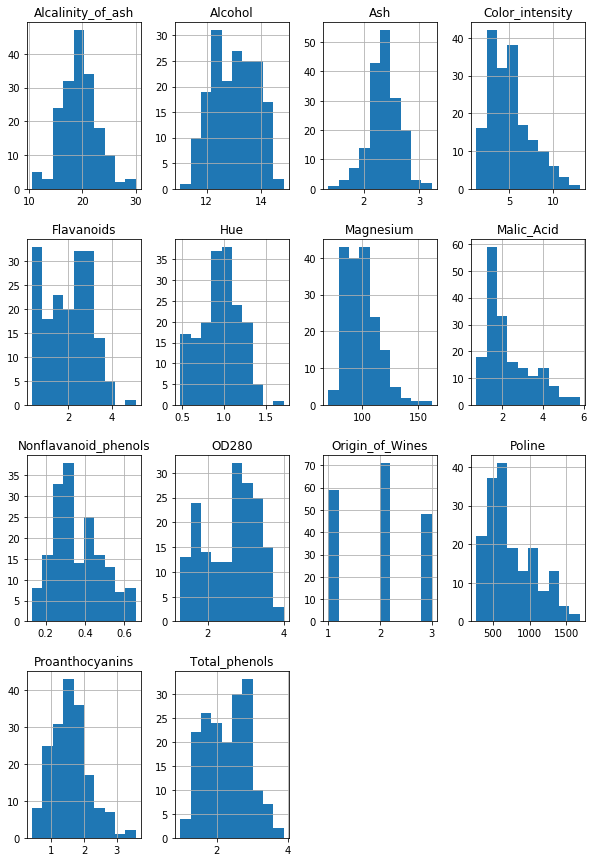

In [19]:
data.hist(figsize = (10, 15))
plt.show()

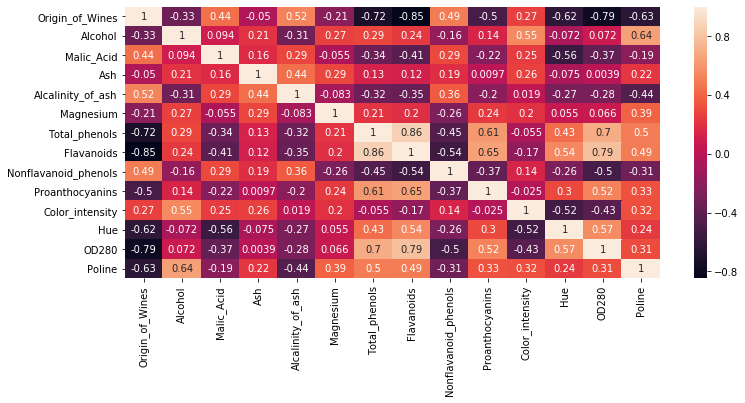

In [26]:
fig, ax = plt.subplots(figsize = (12, 5))
bx = sb.heatmap(data.corr(), annot = True)
bottom, top = ax.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [36]:
data.head()

,Origin_of_Wines,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Poline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
Poline, Color_intensity, Magnesium, Alcalinity_of_ash,Alcohol

# Feature Scaling

In [57]:
sc = StandardScaler()

In [67]:
data[['Alcohol', 'Alcalinity_of_ash', 'Magnesium', 'Color_intensity', 'Poline']] = sc.fit_transform(data[['Alcohol', 
                                                                                                  'Alcalinity_of_ash',
                                                                                                  'Magnesium', 
                                                                                                  'Color_intensity', 
                                                                                                  'Poline']])

In [68]:
data.head()

,Origin_of_Wines,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Poline
0,1,1.518613,1.71,2.43,-1.169593,1.913905,2.80,3.06,0.28,2.29,0.251717,1.04,3.92,1.013009
1,1,0.246290,1.78,2.14,-2.490847,0.018145,2.65,2.76,0.26,1.28,-0.293321,1.05,3.40,0.965242
2,1,0.196879,2.36,2.67,-0.268738,0.088358,2.80,3.24,0.30,2.81,0.269020,1.03,3.17,1.395148
3,1,1.691550,1.95,2.50,-0.809251,0.930918,3.85,3.49,0.24,2.18,1.186068,0.86,3.45,2.334574
4,1,0.295700,2.59,2.87,0.451946,1.281985,2.80,2.69,0.39,1.82,-0.319276,1.04,2.93,-0.037874


# Separating the features and Labels

In [71]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0:1].values

In [72]:
X.shape, Y.shape

((178, 13), (178, 1))

In [73]:
X[1]

array([ 0.24628963,  1.78      ,  2.14      , -2.49084714,  0.01814502,
        2.65      ,  2.76      ,  0.26      ,  1.28      , -0.29332133,
        1.05      ,  3.4       ,  0.96524152])

In [74]:
Y[1]

array([1])

# Splitting the dataset into Train dataset and Test dataset

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [76]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((142, 13), (142, 1), (36, 13), (36, 1))

# Applying PCA

In [79]:
pca = PCA(n_components = None)

At this time we donot know the variance of the components so we take None

In [80]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [81]:
explained_variance = pca.explained_variance_ratio_

In [82]:
explained_variance

array([0.35214754, 0.24843707, 0.10586702, 0.09485959, 0.08227126,
       0.04090496, 0.03279135, 0.01593369, 0.01151608, 0.0078188 ,
       0.00412546, 0.00242339, 0.00090378])

from the above array of variance of components we can see that first 2 components retains  the variation present in the dataset up to the maximum extent.

Therefor the n_components can be replaced by 2 so that the pca extracts the top two variance that explains the most variance

In [84]:
x_train.shape, x_test.shape

((142, 13), (36, 13))

In [85]:
pca1 = PCA(n_components = 2)

In [86]:
x_train = pca1.fit_transform(x_train)
x_test = pca1.transform(x_test)

In [89]:
explained_variance = pca1.explained_variance_ratio_

In [90]:
explained_variance

array([0.35214754, 0.24843707])

In [91]:
x_train.shape, x_test.shape

((142, 2), (36, 2))

In [92]:
x_train[1]

array([-1.21005222, -1.35921417])

In [93]:
x_test[1]

array([-1.56849687,  1.91911836])

# Fitting the Logistic Regression Model to the Training Dataset

In [96]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the Test Set Result

In [97]:
y_pred = classifier.predict(x_test)

In [98]:
y_pred

array([1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [100]:
score = confusion_matrix(y_test, y_pred)
score

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  6]])

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

